<a href="https://colab.research.google.com/github/longthanhta/CNN_miniprojects/blob/main/cat_dog_ver_tf_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np


# Load data, filtering only cat and dog

In [73]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print('training size:',len(test_images),'testing size:',len(test_labels))

training size: 10000 testing size: 10000


In [74]:
# Check number of data for each class
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [75]:
inds_train = np.where((train_labels == 3) | (train_labels == 5))[0]
inds_test = np.where((test_labels == 3) | (test_labels == 5))[0]

train_labels[train_labels == 3] = 1
train_labels[train_labels == 5] = 0
test_labels[test_labels == 3] = 1
test_labels[test_labels == 5] = 0

X_train=train_images[inds_train]
y_train=train_labels[inds_train]
X_test=test_images[inds_test]
y_test=test_labels[inds_test]



print('training size:',len(y_train),'testing size:',len(y_test))



training size: 10000 testing size: 2000


In [76]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=uint8)

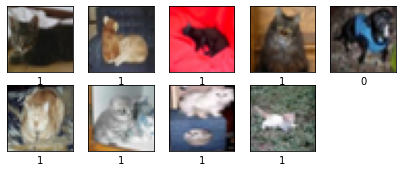

In [77]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i][0])
plt.show()

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 2, 2, 32)        

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6697 - accuracy: 0.3641 - val_loss: 1.4509 - val_accuracy: 0.4595
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3321 - accuracy: 0.5039 - val_loss: 1.2249 - val_accuracy: 0.5509
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1929 - accuracy: 0.5616 - val_loss: 1.2056 - val_accuracy: 0.5628
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1032 - accuracy: 0.5981 - val_loss: 1.2047 - val_accuracy: 0.5504
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0426 - accuracy: 0.6196 - val_loss: 1.0882 - val_accuracy: 0.6035
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9890 - accuracy: 0.6427 - val_loss: 1.0006 - val_accuracy: 0.6333
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9512 - accuracy: 0.6556 - val_loss: 0.9902 - val_accura

313/313 - 1s - loss: 0.8679 - accuracy: 0.6953 - 852ms/epoch - 3ms/step


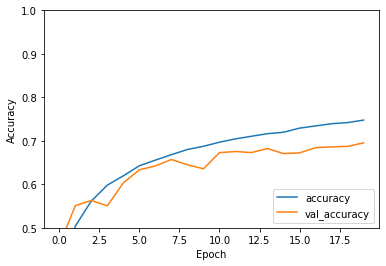

In [80]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)